<a href="https://colab.research.google.com/github/danny1461/CSCI-191T-Machine-Learning/blob/main/assignment_01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

By Daniel Flynn

###Common logic

This includes the reusable bits from each problem below

In [49]:
### Includes
%matplotlib inline
import matplotlib.pyplot as plt
import math

### Common functions
def executeModelForPoint(model, inputs):
  return sum([w*x for w,x in zip(model, inputs)])

def executeModel(model, inputs):
  return [executeModelForPoint(model, x) for x in inputs]

def evaluateModel(predicted, reality):
  return sum([(r-p)**2 for p,r in zip(predicted, reality)])

def calculateModelDeltas(predicted, reality, inputs):
  degree = len(inputs[0])
  dataPoints = len(predicted)

  delta = []
  for i in range(degree):
    d = 1/dataPoints * sum([(-2 * (r-p) * x[i]) for p,r,x in zip(predicted, reality, inputs)])
    delta.append(d)
  
  return delta

def refineModel(model, delta, learningFactor):
  return [(m - learningFactor * d) for m,d in zip(model, delta)]

def plotModelProgress(x, reality, predicted):
  plt.plot(x, reality, "g+")
  plt.plot(x, predicted, "b")
  plt.show()

LEARNING_FACTOR = 0.01
THRESHHOLD = 0.001
PRINT_REGULARITY = 50

def runProblem(data, model):
  inputs, expected = [list(i) for i in zip(*data)]
  # hardcoded to second input as x in plot
  graphXs = [x[1] for x in inputs]

  last_error = 0
  error = float('inf')
  iterations = 0

  # will bail if the error ever starts to increase (prevent infinite loops)
  while last_error - error > THRESHHOLD or math.isinf(error):
    last_error = error;
    predicted = executeModel(model, inputs)
    error = evaluateModel(predicted, expected)
    delta = calculateModelDeltas(predicted, expected, inputs)
    model = refineModel(model, delta, LEARNING_FACTOR)

    if iterations % PRINT_REGULARITY == 0:
      print("Iteration {}:".format(iterations))
      plotModelProgress(graphXs, expected, predicted)
    
    iterations += 1

  if iterations % PRINT_REGULARITY != 0:
    print("Iteration {}:".format(iterations))
    plotModelProgress(graphXs, expected, predicted)

  print("{} Iterations needed for accuracy of {}".format(iterations, THRESHHOLD))

  return model

###Noiseless data

Should be able to achieve high degrees of accuracy


Iteration 0:


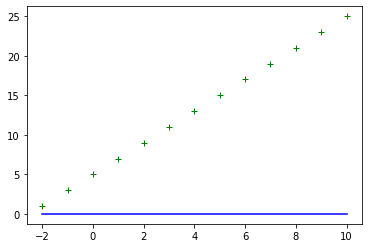

Iteration 50:


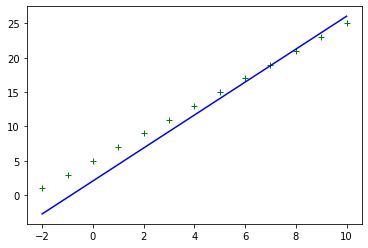

Iteration 100:


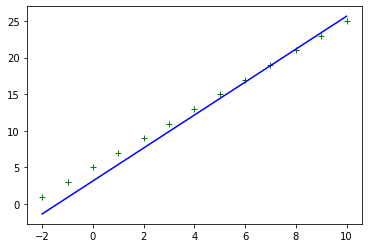

Iteration 150:


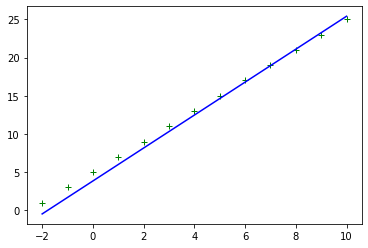

Iteration 200:


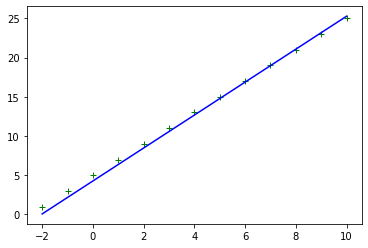

Iteration 250:


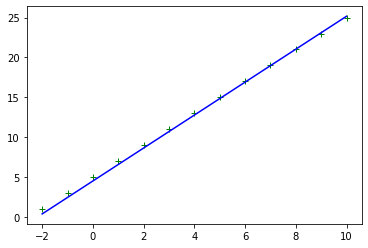

Iteration 300:


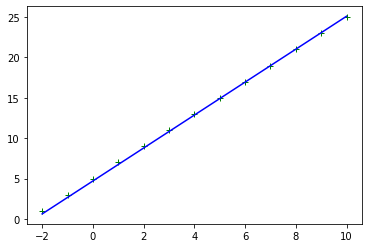

Iteration 350:


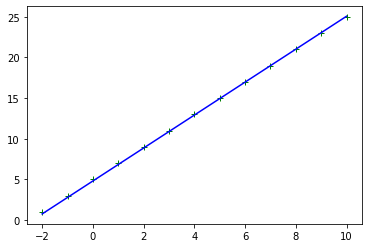

Iteration 400:


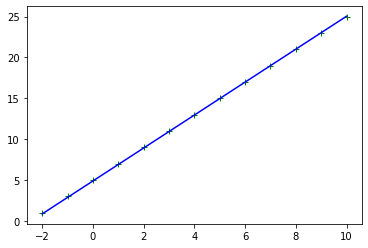

Iteration 425:


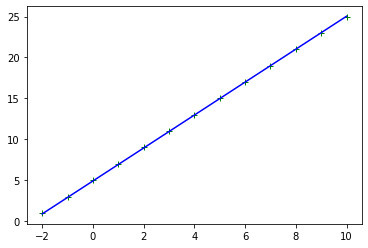

425 Iterations needed for accuracy of 0.001
Model= [4.907329659339901, 2.012547771625653]


In [50]:
data = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
model = runProblem(data, [0, 0])

print("Model=", model)

###Noisy data

Iteration 0:


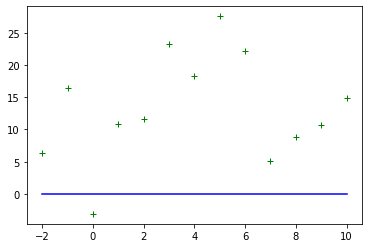

Iteration 50:


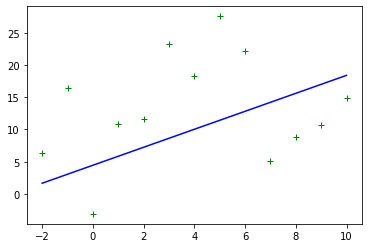

Iteration 100:


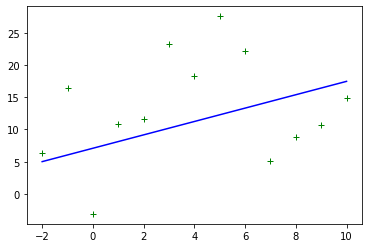

Iteration 150:


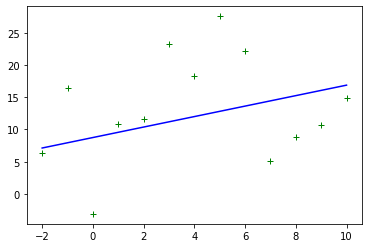

Iteration 200:


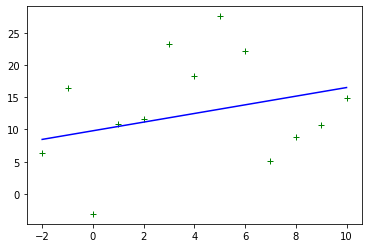

Iteration 250:


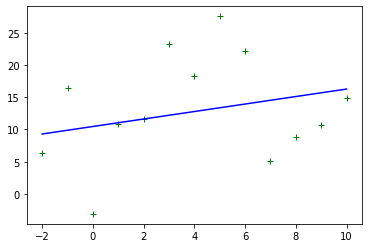

Iteration 300:


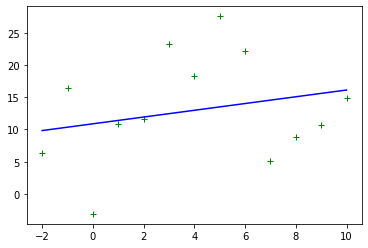

Iteration 350:


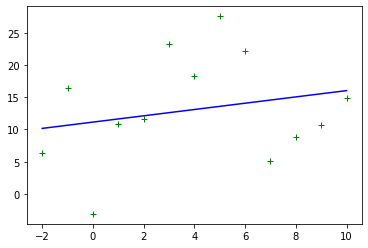

Iteration 400:


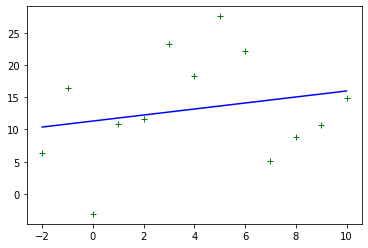

Iteration 450:


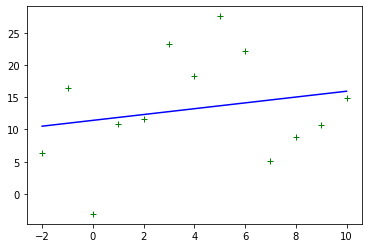

Iteration 500:


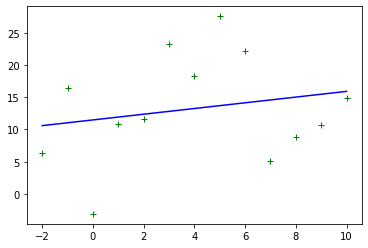

Iteration 522:


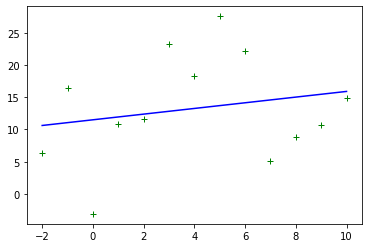

522 Iterations needed for accuracy of 0.001
Model= [11.502965587236435, 0.44038576557289905]


In [51]:
data = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]

model = runProblem(data, [0, 0])

print("Model=", model)

###Experiment

I wanted to see what could happen with the exact same problem as above but with one more input per point. This meant that we would need one more value in the model (3 weights this time)

Iteration 0:


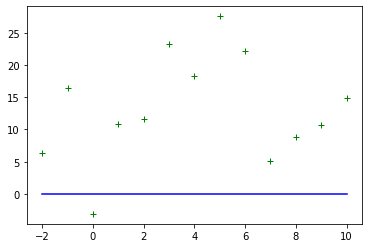

Iteration 9:


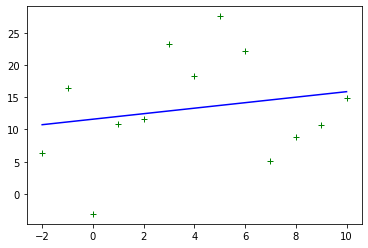

9 Iterations needed for accuracy of 0.001
Model= [0.40321560971426895, 1.8266587763635518, 1.399066101350599]


In [52]:
data = [((1, -2, 10), 6.39), ((1, -1, 9), 16.51), ((1, 0, 8), -3.11), ((1, 1, 7), 10.79), ((1, 2, 6), 11.62), ((1, 3, 5), 23.24), ((1, 4, 4), 18.27), ((1, 5, 3), 27.58), ((1, 6, 2), 22.21), ((1, 7, 1), 5.12), ((1, 8, 0), 8.86), ((1, 9, -1), 10.69), ((1, 10, -2), 14.82)]

model = runProblem(data, [0, 0, 0])

print("Model=", model)

For reason's I'm still not sure of, it solved the problem much more quickly and easily than when there were only 2 inputs per data point even though the new data doesn't really have anything do with the original problem.